In [2]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility

## SU4 t=2

Takes about 1 minute to load the data

In [7]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_120000_t2/output-9.5-10.5/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_120000_t2/output-9.5-10.5/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_120000_t2/output-9.5-10.5/output_twist_2","plaquette:", "real")

## SU4 t=4

Takes about 1 minute to load the data

In [ ]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_120000_t4/output-joined/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_120000_t4/output-joined/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_120000_t4/output-joined/output_twist_2","plaquette:", "real")

# SU4 t=6

In [4]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_120000_t6/su4_phase_transition/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_120000_t6/su4_phase_transition/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_120000_t6/su4_phase_transition/output_twist_2","plaquette:", "real")

In [5]:
plaquette_data_0 = utility.sort_plaquette_dict(plaquette_data_twist_0)
plaquette_data_1 = utility.sort_plaquette_dict(plaquette_data_twist_1)
plaquette_data_2 = utility.sort_plaquette_dict(plaquette_data_twist_2)
print(plaquette_data_0.keys())


dict_keys(['10.75 0', '10.7534 0', '10.7569 0', '10.7603 0', '10.7638 0', '10.7672 0', '10.7707 0', '10.7741 0', '10.7776 0', '10.781 0', '10.7845 0', '10.7879 0', '10.7914 0', '10.7948 0', '10.7983 0', '10.8017 0', '10.8052 0', '10.8086 0', '10.8121 0', '10.8155 0', '10.819 0', '10.8224 0', '10.8259 0', '10.8293 0', '10.8328 0', '10.8362 0', '10.8397 0', '10.8431 0', '10.8466 0', '10.85 0'])


# Computing average wilson action dependent on temperature $\beta$

$< S > = \beta \sum_{dir_1 < dir_2} \sum_{X} \frac{1}{N} \Re Tr[1 - U_{dir_1,dir_2}(X)] $

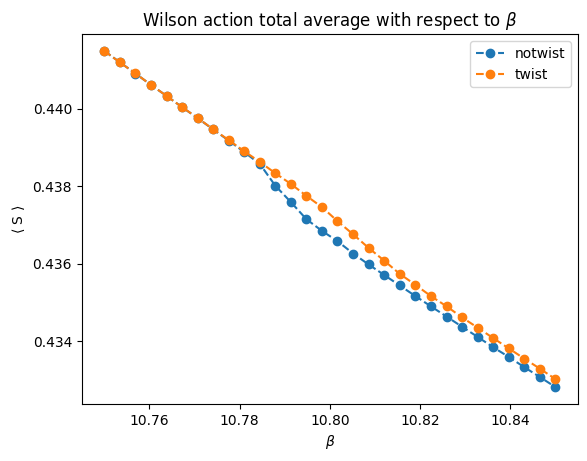

In [6]:
wilson_action.create_average_action_figure(plaquette_data_0,"notwist",plaquette_data_1,"twist")

KeyboardInterrupt: 

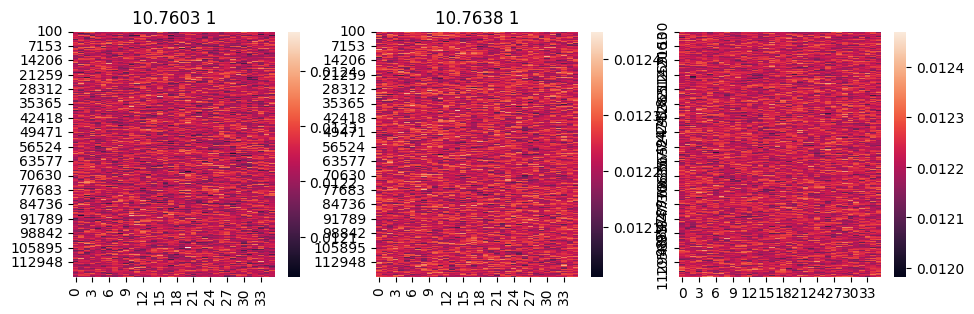

In [7]:
wilson_action.create_z_index_heat_map(utility.select_subset(plaquette_data_1,3,10),mean=False)

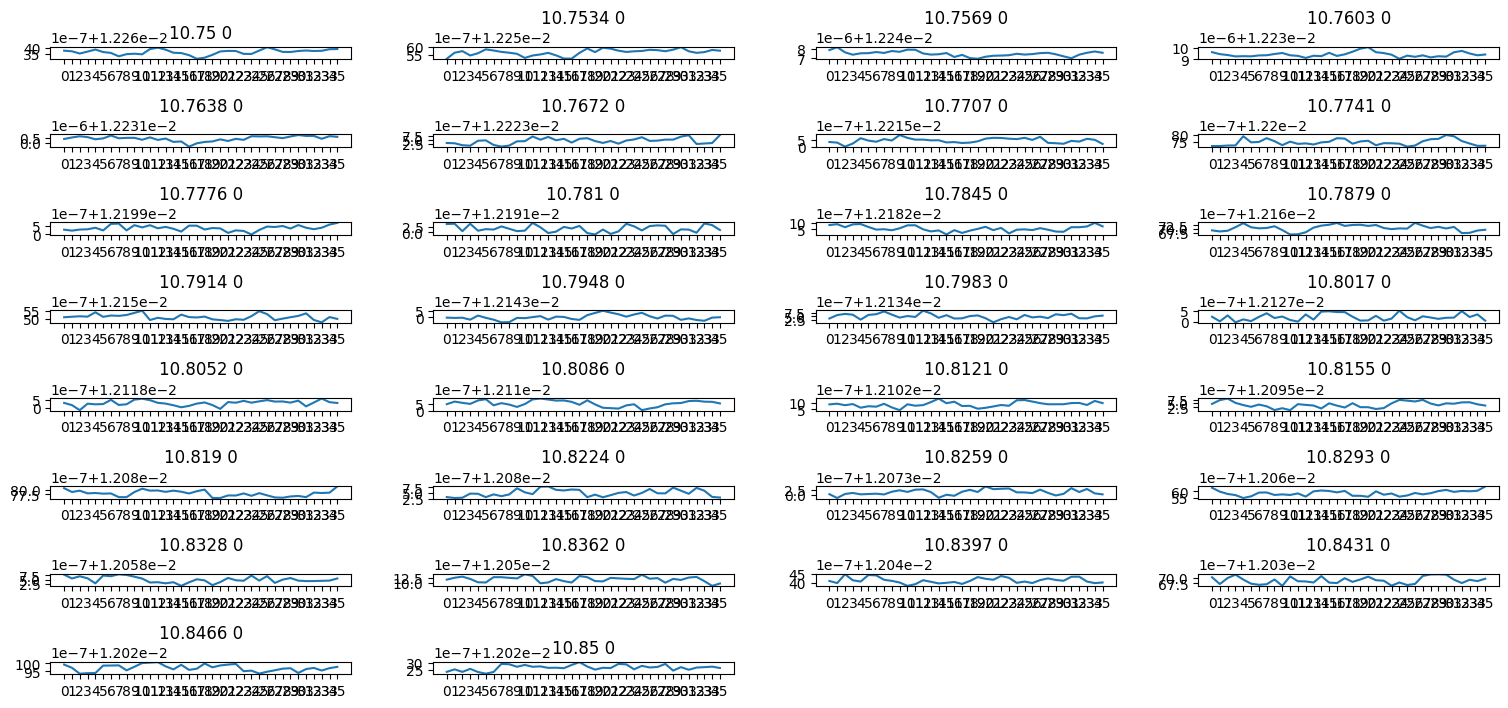

In [10]:
wilson_action.create_z_index_heat_map(plaquette_data_0,mean=True)

In [30]:
errors_twist = utility.compute_with_aa(plaquette_data_twist)
errors_notwist = utility.compute_with_aa(plaquette_data_notwist)

sum_errors_twist = {}
sum_errors_notwist = {}

for key,value in errors_twist.items():
    sum_errors_twist[key] = errors_twist[key]["error"].iloc[-1]

for key,value in errors_notwist.items():
    sum_errors_notwist[key] = errors_notwist[key]["error"].iloc[-1]

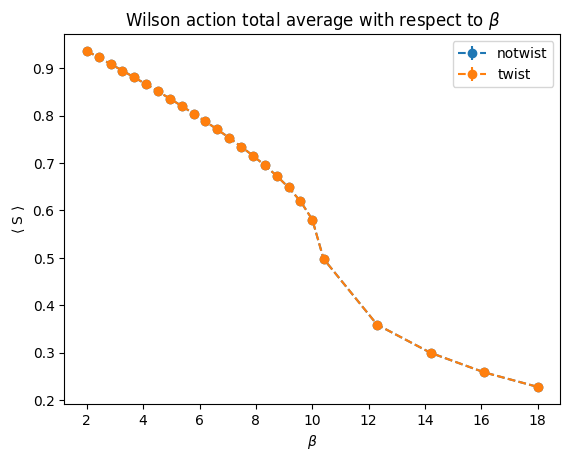

In [31]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist",errors_notwist, errors_twist)

# Jackknife method

- su4 t2 takes around 3 minutes

In [42]:
jackknife_0 = utility.compute_with_aa_jackknife(plaquette_data_0,column=37,bins=20)
jackknife_1 = utility.compute_with_aa_jackknife(plaquette_data_1,column=37,bins=20)
jackknife_2 = utility.compute_with_aa_jackknife(plaquette_data_2,column=37,bins=20)


[[0.0122532 0.0122524 0.0122757 ... 0.0122454 0.0122916 0.441971 ]
 [0.0122913 0.0121948 0.0122601 ... 0.0123037 0.0122777 0.441945 ]
 [0.0122841 0.0122301 0.0123003 ... 0.0123519 0.0123191 0.442065 ]
 ...
 [0.012267  0.0123012 0.012283  ... 0.0123143 0.01221   0.441227 ]
 [0.0122492 0.0122416 0.0121535 ... 0.0122813 0.0123068 0.441499 ]
 [0.012328  0.0122505 0.0122127 ... 0.0122724 0.0123091 0.44115  ]]
[[0.0122223 0.0122247 0.012224  ... 0.0122124 0.0123363 0.441375 ]
 [0.0122668 0.0122163 0.0122467 ... 0.0122342 0.0121878 0.441278 ]
 [0.012226  0.0122384 0.012319  ... 0.0122225 0.0121915 0.441258 ]
 ...
 [0.0122546 0.0122348 0.012237  ... 0.0121462 0.012238  0.440911 ]
 [0.0122481 0.0122555 0.0122322 ... 0.0122654 0.0121593 0.44131  ]
 [0.012273  0.0122608 0.012263  ... 0.0122801 0.0122539 0.44141  ]]
[[0.0122634 0.0122932 0.0122691 ... 0.0122508 0.0123692 0.441253 ]
 [0.0122532 0.0122079 0.0122452 ... 0.0122524 0.0123124 0.441577 ]
 [0.0122146 0.0122364 0.0122563 ... 0.0123024 0.01

In [43]:
jackknife_func_0 = utility.construct_jackknife_functions(jackknife_0)
jackknife_func_1 = utility.construct_jackknife_functions(jackknife_1)
jackknife_func_2 = utility.construct_jackknife_functions(jackknife_2)

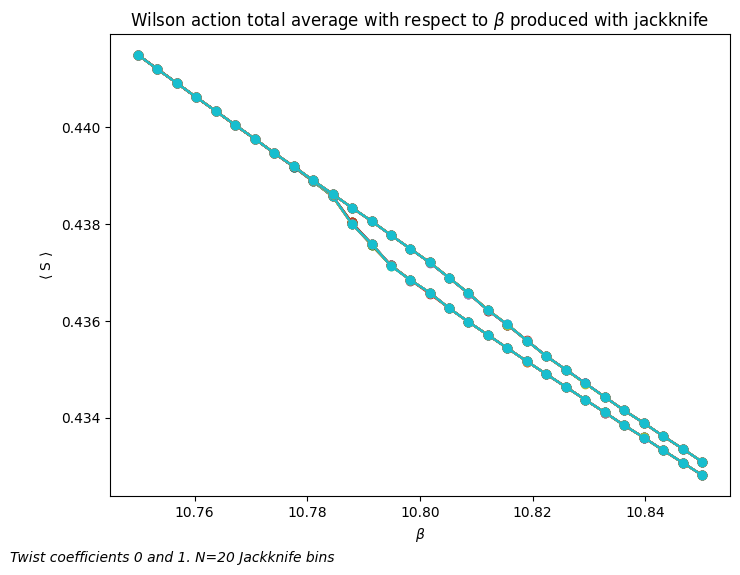

In [57]:
wilson_action.create_average_action_figure_jackknife(jackknife_func_0,"notwist",jackknife_func_2,"twist",plot_fmt="-o",fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

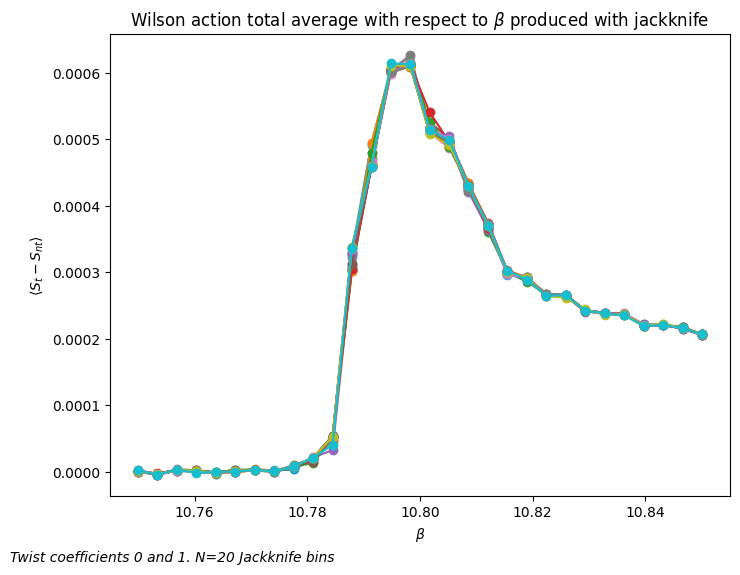

In [86]:
wilson_action.create_twist_notwist_difference_figure_jackknife(jackknife_func_0,jackknife_func_1,plot_fmt="-o",fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

[0.00000000e+00 1.48645230e-09 2.42087026e-09 3.56565871e-09
 4.61165590e-09 5.71023373e-09 7.04238851e-09 7.74424827e-09
 8.41628399e-09 8.66840701e-09 1.19113874e-08 3.07970504e-08
 4.96064568e-08 5.83001845e-08 6.22490400e-08 6.22191050e-08
 6.04872254e-08 6.19073745e-08 6.28305458e-08 6.13644871e-08
 6.04985188e-08 6.00885757e-08 5.96460567e-08 5.97139757e-08
 5.98911176e-08 5.94805633e-08 5.86702207e-08 5.86641750e-08
 5.91653922e-08 5.92644429e-08]


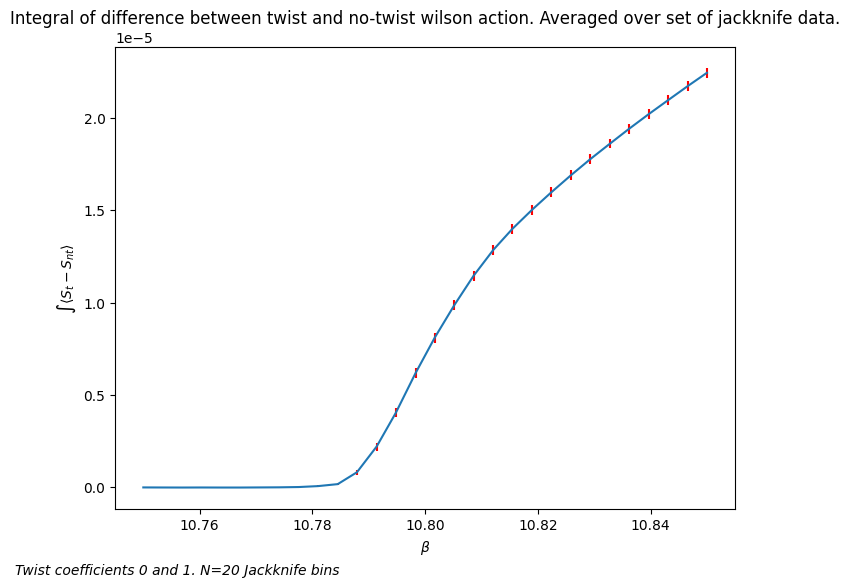

In [66]:
wilson_action.create_integral_figure_jackknife(jackknife_func_0,jackknife_func_1,N=20,plot_fmt="-",fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

nan


/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret 

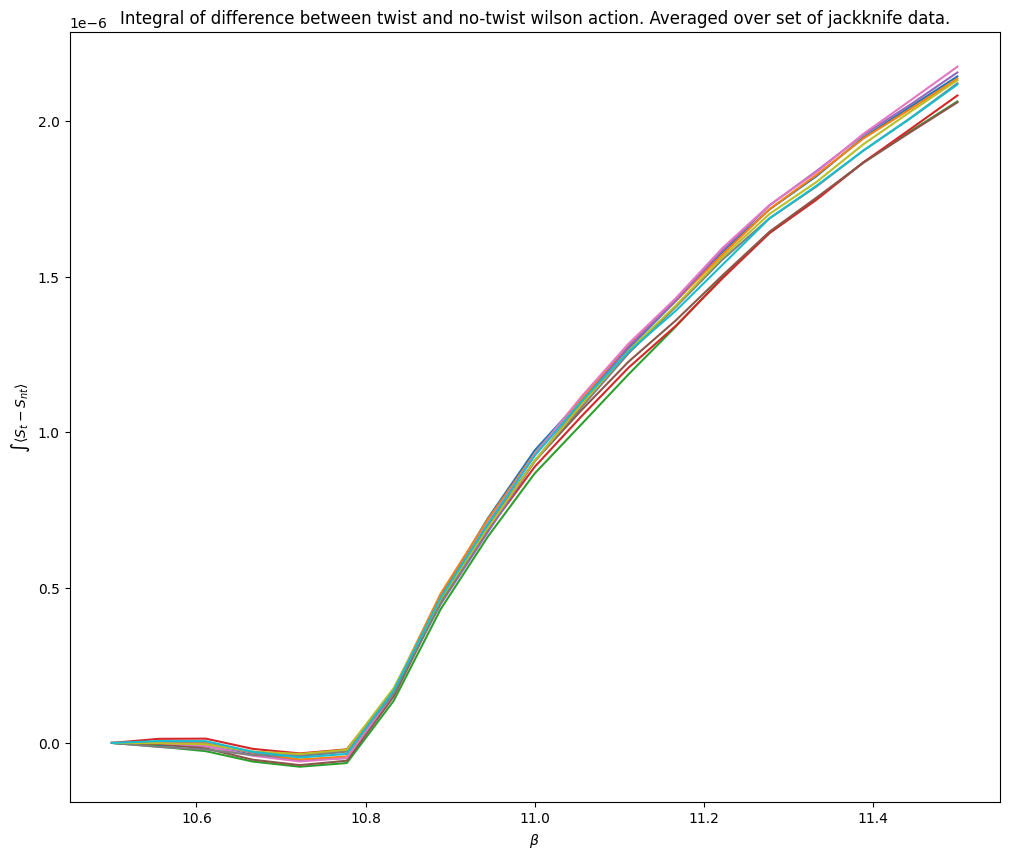

In [23]:
wilson_action.create_integral_figure_jackknife(jackknife_func_0,jackknife_func_1,False)

# FS reweighting

In [29]:
len(plaquette_data_twist)

88

In [67]:
reweight_0 = utility.compute_with_fsh_jackknife(plaquette_data_0,
                                   column="sum",
                                   bins=20,
                                   system_size="#1*24^2*36*6*6",
                                   min_b = 10.75,
                                   max_b=10.85,
                                   acc=0.001)

Runnin fsh
Packing data


In [73]:
reweight_1 = utility.compute_with_fsh_jackknife(plaquette_data_1,
                                   column="sum",
                                   bins=20,
                                   system_size="#1*24^2*36*6*6",
                                   min_b =10.75,
                                   max_b=10.85,
                                   acc=0.001)

Runnin fsh
Packing data


In [81]:
reweight_2 = utility.compute_with_fsh_jackknife(plaquette_data_2,
                                   column="sum",
                                   bins=20,
                                   system_size="#1*24^2*36*6*6",
                                   min_b = 10.75,
                                   max_b=10.85,
                                   acc=0.001)

Runnin fsh
Packing data


In [37]:
print(reweight_2)

(array([10.5  , 10.501, 10.502, ..., 11.498, 11.499, 11.5  ]), array([[0.47074522, 0.47056088, 0.47037918, ..., 0.39437209, 0.39432179,
        0.39427147],
       [0.47074636, 0.47056228, 0.47038001, ..., 0.39437131, 0.39432118,
        0.39427105],
       [0.47074553, 0.47056217, 0.4703812 , ..., 0.39437149, 0.39432126,
        0.39427104],
       ...,
       [0.47074615, 0.4705616 , 0.47037971, ..., 0.3943715 , 0.39432129,
        0.39427113],
       [0.47074715, 0.47056289, 0.47038065, ..., 0.39437188, 0.3943215 ,
        0.39427113],
       [0.4707452 , 0.47056031, 0.47037777, ..., 0.3943722 , 0.3943218 ,
        0.39427141]]), '2')


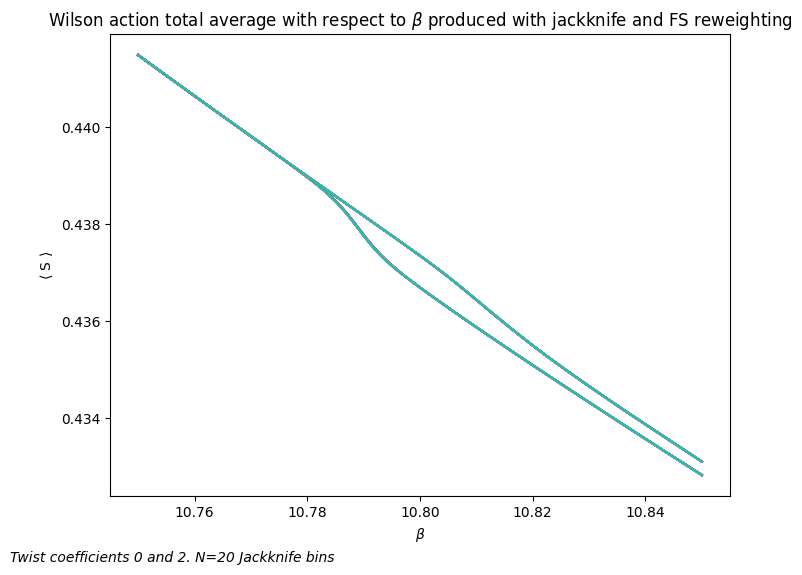

In [88]:
wilson_action.create_average_action_figure_jackknife(reweight_0,"notwist",reweight_2,"twist",FS=True,fig_text="Twist coefficients 0 and 2. N=20 Jackknife bins")

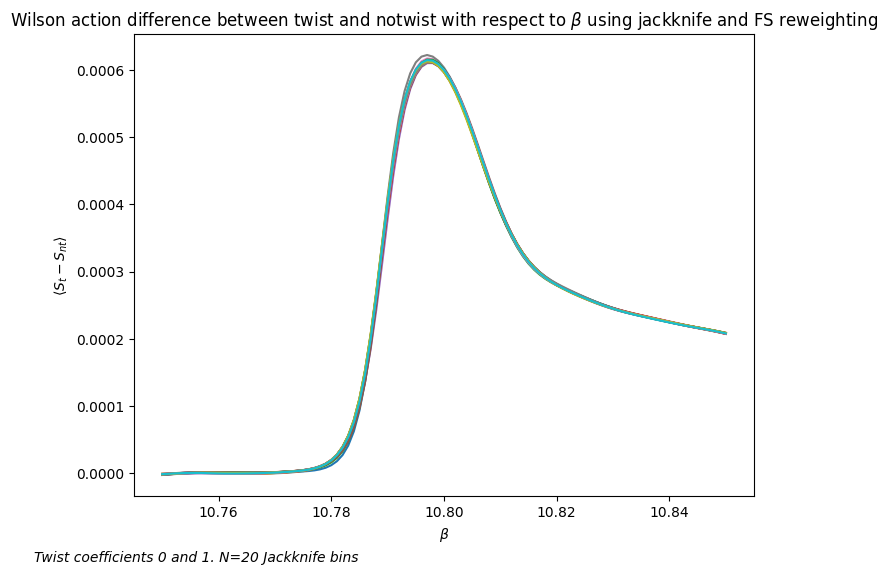

In [90]:
wilson_action.create_twist_notwist_difference_figure_jackknife(reweight_0,reweight_1,FS=True,fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

In [91]:
wilson_action.create_integral_figure_jackknife(reweight_0,reweight_2,N=20,FS=True,fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

TypeError: create_integral_figure_jackknife() got an unexpected keyword argument 'FS'

N_t = 6
N_x = 24
N_y = 24
N_z = 36